In [ ]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements

In [ ]:
!pwd

/content


In [ ]:
!ls

sample_data


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('sample_data/banana_quality.csv')

# Display basic information about the dataset
print(df.info())

# Display the first few rows
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB
None
       Size    Weight  Sweetness  Softness  HarvestTime  Ripeness   Acidity  \
0 -1.924968  0.468078   3.077832 -1.472177     0.294799  2.435570  0.271290   
1 -2.409751  0.486870   0.346921 -2.495099    -0.892213  2.067549  0.307325   
2 -0.357607  1.483176   1.568452 -2.645145    -0.647267  3.090643  1.427322   
3 -0.868524  1.566201   1.889605 -1.273761    -1.006278  1.873001  0.477862   
4  0.651825  1.31919

In [ ]:
print(df.isnull().sum())

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness', 'Acidity']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-0.551136,0.609729,1.975051,-0.705896,0.523951,0.782568,0.114491,Good
1,-0.778107,0.619052,0.573385,-1.201237,-0.070585,0.608493,0.130204,Good
2,0.182685,1.113298,1.200347,-1.273895,0.052101,1.092419,0.618577,Good
3,-0.056521,1.154485,1.365182,-0.609815,-0.127716,0.516472,0.204566,Good
4,0.655290,1.031953,0.383797,-0.578798,-0.340291,0.140598,1.222556,Good


In [ ]:
from autogluon.tabular import TabularPredictor

# Split data into features and target
X = df.drop(columns=['Quality'])
y = df['Quality']

# Initialize and train AutoGluon predictor
predictor = TabularPredictor(label='Quality').fit(train_data=df)

No path specified. Models will be saved in: "AutogluonModels/ag-20241011_194246"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       11.27 GB / 12.67 GB (88.9%)
Disk Space Avail:   61.86 GB / 107.72 GB (57.4%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : F

In [ ]:
performance = predictor.evaluate(df)
print(performance)

{'accuracy': 0.991875, 'balanced_accuracy': 0.9918755442199745, 'mcc': 0.9837502583991511, 'roc_auc': 0.9993600610601373, 'f1': 0.9918841303533524, 'precision': 0.992255808143892, 'recall': 0.9915127309036446}


Computing feature importance via permutation shuffling for 7 features using 5000 rows with 5 shuffle sets...
	20.68s	= Expected runtime (4.14s per shuffle set)
	16.72s	= Actual runtime (Completed 5 of 5 shuffle sets)


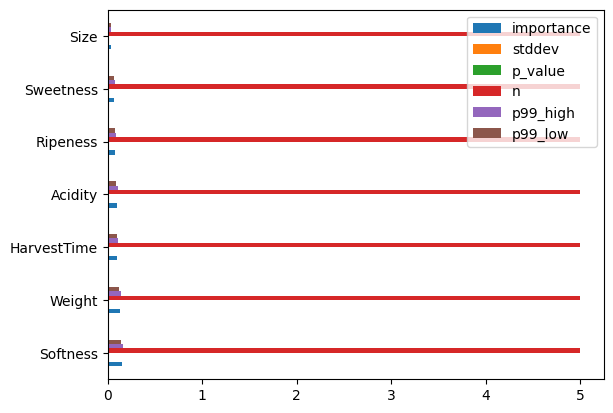

In [ ]:
import matplotlib.pyplot as plt

# Example of feature importance visualization
importance = predictor.feature_importance(df)
importance.plot(kind='barh')
plt.show()